In [33]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

In [4]:
wino=pd.read_csv('wine_data.txt')
wino.head()

,Winery,Alcohol,Malic acid,Ash,Alcalnity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
trainx=np.array(wino.iloc[:,1:])
trainy=np.array(wino.iloc[:,0])

In [8]:
X,X_test,y,y_test=train_test_split(trainx,trainy,test_size=0.3,random_state=43)
print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(124, 13)
(54, 13)
(124,)
(54,)


In [24]:
knn = KNeighborsClassifier(n_neighbors=6)

In [25]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [26]:
pred=knn.predict(X_test)

In [27]:
print(confusion_matrix(y_test,pred))   # rows- true, columns - predicted

[[19  0  1]
 [ 1 15  1]
 [ 1  8  8]]


In [28]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          1       0.90      0.95      0.93        20
          2       0.65      0.88      0.75        17
          3       0.80      0.47      0.59        17

avg / total       0.79      0.78      0.77        54



In [22]:
error_rate = []


for i in range(1,15):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X,y)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

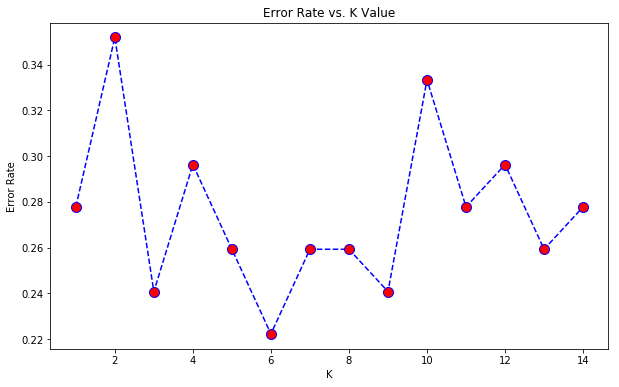

In [23]:
plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

### Optymalizacja  KNeighborsClassifier

In [29]:
from pprint import pprint 

In [32]:
pprint(knn.get_params())

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 6,
 'p': 2,
 'weights': 'uniform'}
